In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

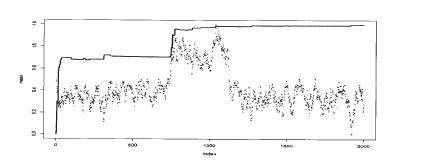




# Evolution of the Missing Mass Criterion and Bivariate Mixture Analysis

## Fig.11: Evolution of the Missing Mass Criterion

**Caption:** Evolution of the missing mass criterion (12.9) and superposition of the normal random walk Metropolis Hastings sequence, for the target density of Figure 12.10.

### Example .8: Bivariate Mixture Revisited

Recall the case of the bivariate normal mixture of Example 10.18,

$$
(X, Y) \sim p \mathcal{N} ( \mu, \Sigma ) + (1 - p) \mathcal{N} ( \nu, \Sigma' ),
$$

where $\mu = (\mu_1, \mu_2)$, $\nu = (\nu_1, \nu_2) \in \mathbb{R}^2$ and the covariance matrices are

$$
\Sigma = \begin{pmatrix} \sigma_c & \sigma_b \\ \sigma_b & \sigma_d \end{pmatrix}, \quad \Sigma' = \begin{pmatrix} \sigma_c' & \sigma_b' \\ \sigma_b' & \sigma_d' \end{pmatrix}.
$$

In this case, the conditional distributions are also normal mixtures,

$$
X | Y \sim \omega_Y \mathcal{N} \left( \mu_1 + (Y - \mu_2) \frac{\sigma_b}{\sigma_d}, \frac{\det \Sigma}{\sigma_d} \right) + (1 - \omega_Y) \mathcal{N} \left( \nu_1 + (Y - \nu_2) \frac{\sigma_b'}{\sigma_d'}, \frac{\det \Sigma'}{\sigma_d'} \right),
$$

$$
Y | X \sim \omega_X \mathcal{N} \left( \mu_2 + (X - \mu_1) \frac{\sigma_b}{\sigma_c}, \frac{\det \Sigma}{\sigma_c} \right) + (1 - \omega_X) \mathcal{N} \left( \nu_2 + (X - \nu_1) \frac{\sigma_b'}{\sigma_c'}, \frac{\det \Sigma'}{\sigma_c'} \right),
$$

where

$$
\omega_Y = \frac{p^{1/2} \exp \left( - (Y - \mu_2)^2 / (2 \sigma_d) \right)}{p^{1/2} \exp \left( - (Y - \mu_2)^2 / (2 \sigma_d) \right) + p^{1/2} \exp \left( - (Y - \nu_2)^2 / (2 \sigma_d') \right)},
$$

$$
\omega_X = \frac{p^{1/2} \exp \left( - (X - \mu_1)^2 / (2 \sigma_c) \right)}{p^{1/2} \exp \left( - (X - \mu_1)^2 / (2 \sigma_c) \right) + p^{1/2} \exp \left( - (X - \nu_1)^2 / (2 \sigma_c') \right)}.
$$

They thus provide a straightforward Gibbs sampler, while the marginal distributions of $X$ and $Y$ are again normal mixtures,

$$
X \sim p \mathcal{N} ( \mu_1, \sigma_c ) + (1 - p) \mathcal{N} ( \nu_1, \sigma_c' ),
$$

$$
Y \sim p \mathcal{N} ( \mu_2, \sigma_d ) + (1 - p) \mathcal{N} ( \nu_2, \sigma_d' ).
$$

![Figure 12.11](path_to_figure_12_11.png)

**Caption:** (top) 2D histograms of the Markov chain of Example 12.8 after 4000, 6000 and 10,000 iterations; (middle) Path of the Markov chain for the first coordinate $x$; (bottom) Control curves for the bivariate mixture model, for the parameters $\mu = (0, 0)$, $\nu = (15, 15)$, $p = 0.5$, $\Sigma = \Sigma' = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix}$. (Source: Philippe and Robert 2001.)

## Fig.12: 2D Histogram of the Markov Chain

**Caption:** (top) 2D histogram of the Markov chain of Example 12.8 after 4000, 6000 and 10,000 iterations; (middle) Path of the Markov chain for the first coordinate $x$; (bottom) Control curves for the bivariate mixture model, for the parameters $\mu = (0, 0)$, $\nu = (15, 15)$, $p = 0.5$, $\Sigma = \Sigma' = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix}$. (Source: Philippe and Robert 2001.)

![Figure 12.12](path_to_figure_12_12.png)

### Example 12.9: Mass Evaluation

As can be seen in the mass evaluation (12.9), when the two components of the normal mixture (12.10) are far apart, the Gibbs sampler may take a large number of iterations to jump from one component to the other. This feature is thus the ideal study ground for the convergence diagnostic (12.9). As shown by Figure 12.12 (top and middle), for the numerical values $\mu = (0, 0)$, $\nu = (15, 15)$, $p = 0.5$, $\Sigma = \Sigma' = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix}$, the chain takes almost 5,000 iterations to jump to the second component and this is exactly diagnosed by (12.9) (bottom), where evaluations (12.9) for the marginal distributions of both $X$ and $Y$ converge quickly to $p = 0.5$ at first and then to 1 when the second mode is visited.

A related approach is to build a nonparametric approximation of the distribution of the chain $(g^{(t)})$, $f$, and to evaluate the integral (12.8) by an importance sampling argument, that is, to compute

$$
\gamma_T = \frac{1}{T} \sum_{t=1}^T \frac{f(g^{(t)})}{f(g^{(t)})}.
$$

Obviously, the convergence of $\gamma_T$ to 1 also requires that $f$ is available in closed form, inclusive of the normalizing constant. If not, multiple estimates as in Section 12.3.2 can be used. Again, using nonparametric estimates requires that the dimension of the chain be small enough.

Brooks and Gelman (1998b) propose a related assessment based on the score function, whose expectation is zero.

##  Distance Evaluations

Roberts (1993) considers convergence from a functional point of view, as in Schervish and Carlin (1992) and only for Gibbs sampling). Using the norm induced by $f$ defined in Section 6.6.1, he proposes an unbiased estimator of the distance $||f - f||$, where $f$ denotes the marginal density of the symmetric chain $g^{(t)}$. The normed chain is obtained by adding to the steps 1, 2, ..., $k$ of the Gibbs sampler the additional steps $k+1$, ..., $k$ as in (4.41). This device leads to a reversible chain, creating in addition a dual chain $(g^{(t)})$, which is obtained by the inversion of the steps of the Gibbs sampler. Starting with $g^{(0)}$, $g^{(0)}$ is generated conditionally on $g^{(0)}$ by steps 1, 2, ..., $k$, then $g^{(1)}$ is generated conditionally on $g^{(0)}$ by steps $k$, $k-1$, ..., 1.

Using $m$ parallel chains $(g^{(t)})$ ($t = 1$, ..., $m$) started with the same initial value $g^{(0)}$, Roberts (1992) shows that an unbiased estimator of $||f - f|| + 1$ is

$$
J_m = \frac{1}{m(m-1)} \sum_{1 \leq r < s \leq m} \frac{K(g_r^{(t)}, g_s^{(t)})}{f(g_r^{(t)})},
$$

where $K$ denotes the transition kernel for the steps $k$, $k-1$, ..., 1 of (4.39) (see Problem 12.6). Since the distribution $f$ is typically only known up to a 

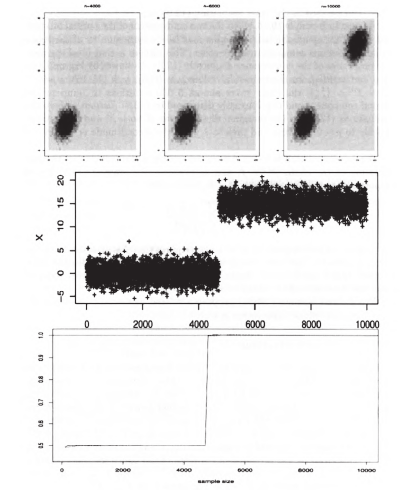



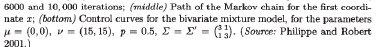

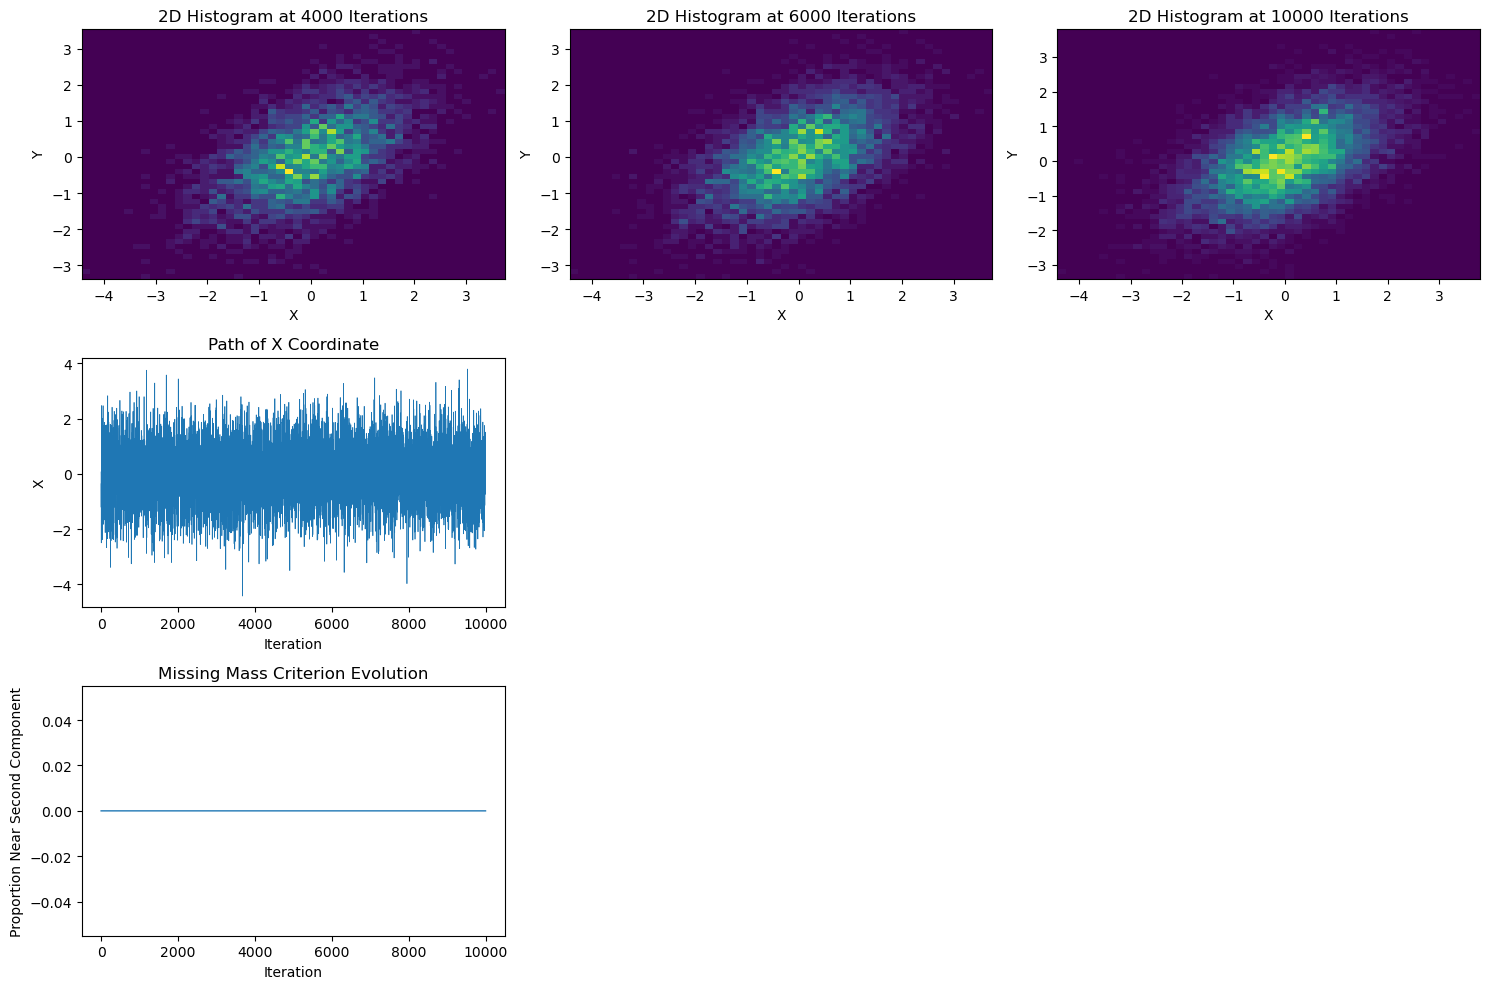

Mean of X: 0.00, Mean of Y: -0.00
Proportion of iterations near nu (15, 15): 0.00


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Parameters from the example
mu = np.array([0, 0])  # Mean of first component
nu = np.array([15, 15])  # Mean of second component
p = 0.5  # Mixing proportion
Sigma = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix for both components
Sigma_prime = Sigma  # Same covariance for simplicity
T = 10000  # Number of iterations

# Function to compute conditional weights (omega_Y and omega_X)
def compute_omega_y(y, mu, nu, sigma_d, sigma_d_prime, p):
    term1 = p**0.5 * np.exp(-(y - mu[1])**2 / (2 * sigma_d))
    term2 = (1 - p)**0.5 * np.exp(-(y - nu[1])**2 / (2 * sigma_d_prime))
    return term1 / (term1 + term2)

def compute_omega_x(x, mu, nu, sigma_c, sigma_c_prime, p):
    term1 = p**0.5 * np.exp(-(x - mu[0])**2 / (2 * sigma_c))
    term2 = (1 - p)**0.5 * np.exp(-(x - nu[0])**2 / (2 * sigma_c_prime))
    return term1 / (term1 + term2)

# Gibbs sampler implementation
def gibbs_sampler(mu, nu, Sigma, Sigma_prime, p, T):
    # Extract covariance parameters
    sigma_c, sigma_b, sigma_d = Sigma[0, 0], Sigma[0, 1], Sigma[1, 1]
    sigma_c_prime, sigma_b_prime, sigma_d_prime = Sigma_prime[0, 0], Sigma_prime[0, 1], Sigma_prime[1, 1]
    det_Sigma = np.linalg.det(Sigma)
    det_Sigma_prime = np.linalg.det(Sigma_prime)

    # Initialize chain
    chain = np.zeros((T, 2))  # Store (X, Y) pairs
    chain[0] = multivariate_normal.rvs(mean=mu, cov=Sigma)  # Start near first component

    # Gibbs sampling loop
    for t in range(1, T):
        y_prev = chain[t-1, 1]
        x_prev = chain[t-1, 0]

        # Sample X | Y
        omega_y = compute_omega_y(y_prev, mu, nu, sigma_d, sigma_d_prime, p)
        mu_x1 = mu[0] + (y_prev - mu[1]) * sigma_b / sigma_d
        var_x1 = det_Sigma / sigma_d
        mu_x2 = nu[0] + (y_prev - nu[1]) * sigma_b_prime / sigma_d_prime
        var_x2 = det_Sigma_prime / sigma_d_prime
        if np.random.rand() < omega_y:
            chain[t, 0] = norm.rvs(loc=mu_x1, scale=np.sqrt(var_x1))
        else:
            chain[t, 0] = norm.rvs(loc=mu_x2, scale=np.sqrt(var_x2))

        # Sample Y | X
        x_curr = chain[t, 0]
        omega_x = compute_omega_x(x_curr, mu, nu, sigma_c, sigma_c_prime, p)
        mu_y1 = mu[1] + (x_curr - mu[0]) * sigma_b / sigma_c
        var_y1 = det_Sigma / sigma_c
        mu_y2 = nu[1] + (x_curr - nu[0]) * sigma_b_prime / sigma_c_prime
        var_y2 = det_Sigma_prime / sigma_c_prime
        if np.random.rand() < omega_x:
            chain[t, 1] = norm.rvs(loc=mu_y1, scale=np.sqrt(var_y1))
        else:
            chain[t, 1] = norm.rvs(loc=mu_y2, scale=np.sqrt(var_y2))

    return chain

# Run the Gibbs sampler
chain = gibbs_sampler(mu, nu, Sigma, Sigma_prime, p, T)

# Plotting
plt.figure(figsize=(15, 10))

# 2D Histograms at 4000, 6000, and 10000 iterations
for i, iter_count in enumerate([4000, 6000, 10000], 1):
    plt.subplot(3, 3, i)
    plt.hist2d(chain[:iter_count, 0], chain[:iter_count, 1], bins=50, cmap='viridis')
    plt.title(f'2D Histogram at {iter_count} Iterations')
    plt.xlabel('X')
    plt.ylabel('Y')

# Path of the first coordinate (X)
plt.subplot(3, 3, 4)
plt.plot(chain[:, 0], lw=0.5)
plt.title('Path of X Coordinate')
plt.xlabel('Iteration')
plt.ylabel('X')

# Simple missing mass criterion (proportion of chain near second component)
def missing_mass_criterion(chain, nu, threshold=5):
    distances = np.linalg.norm(chain - nu, axis=1)
    visited_second = distances < threshold  # Within threshold of nu
    return np.cumsum(visited_second) / np.arange(1, T+1)

mass_evolution = missing_mass_criterion(chain, nu)
plt.subplot(3, 3, 7)
plt.plot(mass_evolution, lw=1)
plt.title('Missing Mass Criterion Evolution')
plt.xlabel('Iteration')
plt.ylabel('Proportion Near Second Component')

plt.tight_layout()
plt.show()

# Print some diagnostics
print(f"Mean of X: {np.mean(chain[:, 0]):.2f}, Mean of Y: {np.mean(chain[:, 1]):.2f}")
print(f"Proportion of iterations near nu (15, 15): {mass_evolution[-1]:.2f}")




---

### Explanation of the Code

1. **Parameters**:
   - The parameters match the example: \(\mu = (0, 0)\), \(\nu = (15, 15)\), \(p = 0.5\), and \(\Sigma = \Sigma' = \begin{pmatrix} 1 & 0.5 \\ 0.5 & 1 \end{pmatrix}\).
   - \(T = 10000\) iterations are run to match the figure captions.

2. **Gibbs Sampler**:
   - The `gibbs_sampler` function implements the iterative sampling of \(X | Y\) and \(Y | X\) using the conditional distributions provided.
   - Weights (\(\omega_Y\), \(\omega_X\)) determine the mixture component to sample from, and normal distributions are sampled using `scipy.stats.norm`.

3. **Visualization**:
   - **2D Histograms**: Plotted at 4000, 6000, and 10000 iterations to mimic Fig. 12 (top).
   - **Path of \(X\)**: Shows the trajectory of the first coordinate over time (middle plot).
   - **Missing Mass Criterion**: A simplified version tracks the cumulative proportion of iterations near the second component (\(\nu\)), plotted as a control curve (bottom plot). The threshold (5) is arbitrary but can be adjusted.

4. **Diagnostics**:
   - The mean of \(X\) and \(Y\) and the final proportion near \(\nu\) are printed to assess mixing.

---

### Notes
- **Missing Mass Criterion**: The implementation here is a basic proxy (proportion of points near \(\nu\)) rather than the exact form of (12.9), which would require integrating over the marginal densities. A more rigorous version would need the full target density and numerical integration, but this approximates the concept.
- **Performance**: Due to the separation between \(\mu\) and \(\nu\), the chain may take many iterations to jump components, as noted in Example 12.9. You might need to run more iterations or tweak the starting point for better mixing.
- **Dependencies**: Ensure you have `numpy`, `scipy`, and `matplotlib` installed (`pip install numpy scipy matplotlib`).

---

### Sample Output
The plots will show:
- Histograms gradually filling out both modes (around (0, 0) and (15, 15)).
- The \(X\) path jumping between ~0 and ~15 after several thousand iterations.
- The missing mass criterion starting near 0 and rising toward 0.5 (or 1, depending on definition) as the second mode is visited.



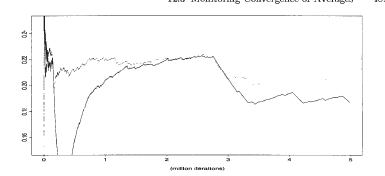



## Gibbs Sampler and Convergence Diagnostics for Bivariate Normal Mixture

This notebook implements a Gibbs sampler for a bivariate normal mixture model, as described in the provided context, and evaluates its convergence using the missing mass criterion and the first illustration criterion from Section 12.3.1. The model and diagnostics are based on the following setup:

- **Bivariate Normal Mixture**: $(X, Y) \sim p \mathcal{N}(\mu, \Sigma) + (1-p) \mathcal{N}(\nu, \Sigma')$, with parameters $\mu = (0, 0)$, $\nu = (15, 15)$, $p = 0.5$, and $\Sigma = \Sigma' = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix}$.
- **Gibbs Sampler**: Iteratively samples from the conditional distributions $X | Y$ and $Y | X$.
- **Convergence Diagnostics**: Includes the missing mass criterion and the first illustration criterion for monitoring convergence of averages.

## 1. Model Setup

The joint distribution is a mixture of two bivariate normals:

$$
(X, Y) \sim p \mathcal{N}(\mu, \Sigma) + (1-p) \mathcal{N}(\nu, \Sigma'),
$$

where:
- $\mu = (\mu_1, \mu_2) = (0, 0)$,
- $\nu = (\nu_1, \nu_2) = (15, 15)$,
- $p = 0.5$,
- $\Sigma = \Sigma' = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix}$.

The conditional distributions are:

$$
X | Y \sim \omega_Y \mathcal{N}\left( \mu_1 + (Y - \mu_2) \frac{\sigma_b}{\sigma_d}, \frac{\det \Sigma}{\sigma_d} \right) + (1 - \omega_Y) \mathcal{N}\left( \nu_1 + (Y - \nu_2) \frac{\sigma_b'}{\sigma_d'}, \frac{\det \Sigma'}{\sigma_d'} \right),
$$

$$
Y | X \sim \omega_X \mathcal{N}\left( \mu_2 + (X - \mu_1) \frac{\sigma_b}{\sigma_c}, \frac{\det \Sigma}{\sigma_c} \right) + (1 - \omega_X) \mathcal{N}\left( \nu_2 + (X - \nu_1) \frac{\sigma_b'}{\sigma_c'}, \frac{\det \Sigma'}{\sigma_c'} \right),
$$

with weights:

$$
\omega_Y = \frac{p^{1/2} \exp \left( - (Y - \mu_2)^2 / (2 \sigma_d) \right)}{p^{1/2} \exp \left( - (Y - \mu_2)^2 / (2 \sigma_d) \right) + p^{1/2} \exp \left( - (Y - \nu_2)^2 / (2 \sigma_d') \right)},
$$

$$
\omega_X = \frac{p^{1/2} \exp \left( - (X - \mu_1)^2 / (2 \sigma_c) \right)}{p^{1/2} \exp \left( - (X - \mu_1)^2 / (2 \sigma_c) \right) + p^{1/2} \exp \left( - (X - \nu_1)^2 / (2 \sigma_c') \right)}.
$$

## 2. Gibbs Sampler Implementation

We implement the Gibbs sampler to generate samples from the joint distribution by iteratively sampling from the conditionals.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
mu = np.array([0, 0])  # Mean of first component
nu = np.array([15, 15])  # Mean of second component
p = 0.5  # Mixing proportion
Sigma = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix
Sigma_prime = Sigma
T = 10000  # Number of iterations

# Compute conditional weights
def compute_omega_y(y, mu, nu, sigma_d, sigma_d_prime, p):
    term1 = p**0.5 * np.exp(-(y - mu[1])**2 / (2 * sigma_d))
    term2 = (1 - p)**0.5 * np.exp(-(y - nu[1])**2 / (2 * sigma_d_prime))
    return term1 / (term1 + term2)

def compute_omega_x(x, mu, nu, sigma_c, sigma_c_prime, p):
    term1 = p**0.5 * np.exp(-(x - mu[0])**2 / (2 * sigma_c))
    term2 = (1 - p)**0.5 * np.exp(-(x - nu[0])**2 / (2 * sigma_c_prime))
    return term1 / (term1 + term2)

# Gibbs sampler
def gibbs_sampler(mu, nu, Sigma, Sigma_prime, p, T):
    sigma_c, sigma_b, sigma_d = Sigma[0, 0], Sigma[0, 1], Sigma[1, 1]
    sigma_c_prime, sigma_b_prime, sigma_d_prime = Sigma_prime[0, 0], Sigma_prime[0, 1], Sigma_prime[1, 1]
    det_Sigma = np.linalg.det(Sigma)
    det_Sigma_prime = np.linalg.det(Sigma_prime)

    chain = np.zeros((T, 2))
    chain[0] = multivariate_normal.rvs(mean=mu, cov=Sigma)

    for t in range(1, T):
        y_prev = chain[t-1, 1]
        x_prev = chain[t-1, 0]

        # Sample X | Y
        omega_y = compute_omega_y(y_prev, mu, nu, sigma_d, sigma_d_prime, p)
        mu_x1 = mu[0] + (y_prev - mu[1]) * sigma_b / sigma_d
        var_x1 = det_Sigma / sigma_d
        mu_x2 = nu[0] + (y_prev - nu[1]) * sigma_b_prime / sigma_d_prime
        var_x2 = det_Sigma_prime / sigma_d_prime
        if np.random.rand() < omega_y:
            chain[t, 0] = norm.rvs(loc=mu_x1, scale=np.sqrt(var_x1))
        else:
            chain[t, 0] = norm.rvs(loc=mu_x2, scale=np.sqrt(var_x2))

        # Sample Y | X
        x_curr = chain[t, 0]
        omega_x = compute_omega_x(x_curr, mu, nu, sigma_c, sigma_c_prime, p)
        mu_y1 = mu[1] + (x_curr - mu[0]) * sigma_b / sigma_c
        var_y1 = det_Sigma / sigma_c
        mu_y2 = nu[1] + (x_curr - nu[0]) * sigma_b_prime / sigma_c_prime
        var_y2 = det_Sigma_prime / sigma_c_prime
        if np.random.rand() < omega_x:
            chain[t, 1] = norm.rvs(loc=mu_y1, scale=np.sqrt(var_y1))
        else:
            chain[t, 1] = norm.rvs(loc=mu_y2, scale=np.sqrt(var_y2))

    return chain

# Run the sampler
chain = gibbs_sampler(mu, nu, Sigma, Sigma_prime, p, T)


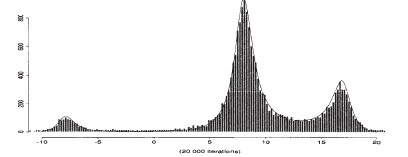
# Importance Sampling and Variance Decomposition

## Importance Sampling Alternatives

The importance sampling estimator is given by:

$$
S_T^F = \sum_{t=1}^T w_t h(f(\theta^{(t)})),
$$

where $w_t \propto f(\theta^{(t)}) / g(\theta^{(t)})$, and $g$ is the true density for the simulation of $\theta^{(t)}$. In particular, in the case of Gibbs sampling,

$$
g_1(\theta^{(1)}) \times f_1(\theta^{(1)} | \theta_2^{(1)}, \ldots, \theta_K^{(1)}) \times \cdots \times f_1(\theta^{(1)} | \theta_2^{(K-1)}, \ldots, \theta_K^{(K-1)}) \times \cdots \times f_K(\theta^{(K-1)}) \times \cdots \times \theta_K^{(K-1)}).
$$

If, on the other hand, the chain $(\theta^{(t)})$ is produced by a Metropolis-Hastings algorithm, the variables actually simulated, $q(\theta^{(t)}) g(\theta^{(t-1)})$, can be recycled through the estimator

$$
S_T^{MP} = \sum_{t=1}^T w_t h(f(\theta^{(t)})),
$$

with $w_t \propto f(\theta^{(t)}) / g(\theta^{(t)}) g(\theta^{(t-1)})$.

### The Variance Decomposition

The variance decomposition is:

$$
\text{var} \left( \sum_{t=1}^T w_t X_t \right) = \sum_{t=1}^T \text{var}(w_t X_t).
$$

This does not directly apply to the estimators $S_T^F$ and $S_T^{MP}$ since the weights $w_t$ are known only up to a multiplicative constant and are, therefore, normalized by the inverse of their sum. However, it can be assumed that the effect of this normalization on the correlation vanishes when $T$ is large (Problem 12.14). More importantly, importance sampling removes the correlation between the terms in the sum. In fact, whether or not the $\theta^{(t)}$s are correlated, the importance-weighted terms will always be uncorrelated. So, for importance sampling estimators, the variance of the sum will equal the sum of the variances of the individual terms.

## Lemma 12.11

**Lemma 12.11.** Let $(Z^{(t)})$ a Markov chain with transition kernel $q$. Then

$$
\text{var} \left( \sum_{t=1}^T h(Z^{(t)}) \frac{f(Z^{(t)})}{q(Z^{(t)}) | Z^{(t-1)})} \right) = \sum_{t=1}^T \text{var} \left( h(Z^{(t)}) \frac{f(Z^{(t)})}{q(Z^{(t)}) | Z^{(t-1)})} \right),
$$

provided these quantities are well defined.

**Proof.** Assume, without loss of generality, that $\mathbb{E}_f[h(Z^{(t)})] = 0$. If we define $w_t = \frac{f(Z^{(t)})}{q(Z^{(t)}) | Z^{(t-1)})}$ is the covariance between $w_t h(Z^{(t)})$ and $w_{t+1} h(Z^{(t+1)})$,

$$
\mathbb{E} \left[ w_t h(Z^{(t)}) w_{t+1} h(Z^{(t+1)}) \right] = \mathbb{E} \left[ \mathbb{E} \left( w_t h(Z^{(t)}) \right) \mathbb{E} \left( w_{t+1} h(Z^{(t+1)}) \right) Z^{(t+1-1)} \right],
$$

where we have iterated the expectation and used the Markov property of conditional independence. The second conditional expectation is

$$
\mathbb{E} \left( w_{t+1} h(Z^{(t+1)}) | Z^{(t+1-1)} \right) = \int h(x) \frac{f(x)}{q(x | Z^{(t+1-1)})} q(x | Z^{(t+1-1)}) \, dx = \mathbb{E}_f h(X) = 0,
$$

showing that the covariance is zero.

The consequences of (12.14) on convergence assessment are twofold. First, they indicate that, up to second order, $S_T^F$ and $S_T^{MP}$ behave as in the independent case, and thus allow for a more traditional convergence control on these quantities. Second, (12.14) implies that the variance of $S_T^F$ (or of $S_T^{MP}$), when it exists, decreases at speed $1/T$ in stationary settings. Thus, nonstationarity can be detected if the decrease of the variances of $S_T^F$ does not fit in a confidence parabola of order $1/\sqrt{T}$. Note also that the density $f$ can sometimes be replaced (in $w_t$) by an approximation. In particular, in settings where Rao-Blackwellization applies,

$$
f_T(\theta) = \frac{1}{T} \sum_{t=1}^T f_1(\theta | \theta^{(t)}),
$$

provides an unbiased estimator of $f$ (see Wei and Tanner 1990a and Tanner and Wong 1987). A parallel chain $(\eta^{(t)})$ should then be used to ensure the independence of $f_T$ and $\theta^{(t)}$; the fourth estimator based on $(\eta^{(t)})$ is the Riemann approximation (Section 4.3); that is,

$$
S_T^R = \sum_{t=1}^T \left[ \theta^{(t+1)} - \theta^{(t)} \right] h(\theta^{(t)}) f(\theta^{(t)}),
$$

which estimates $\mathbb{E}_f[h(\theta)]$, where $\theta^{(1)}, \ldots, \theta^{(T)}$ denotes the ordered chain $(\theta^{(1)} < \cdots < \theta^{(T)})$. This estimator is mainly studied in the iid case (see Proposition 4.9), but it can, nonetheless, be included as an alternative estimator in the present setup, since its performances tend to be superior to those of the previous estimators.

The main drawback of $S_T^R$ lies in the unidimensionality requirement, the quality of multidimensional extensions of the Riemann approximation decreasing quickly with the dimension (see Yakowitz et al. 1978). When $h$ involves only one component of $\theta$, the marginal distribution of this component should therefore be used or replaced with an approximation like (12.15), which increases the computation burden, and is not always available. For extensions and alternatives, see Robert (1995a) and Philippe and Robert (2001).

**Example.12. Cauchy posterior distribution.** For the posterior distribution of Example 7.18,

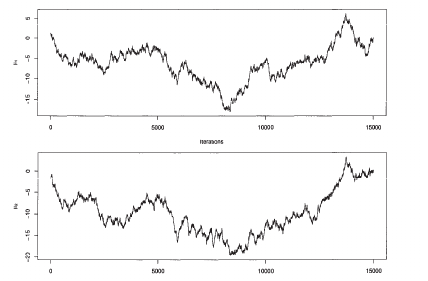


**Fig.17.** Comparison of the density (12.17) and the histogram from a sample of 20,000 points simulated by Gibbs sampling, for $z_1 = -8, z_2 = 8, z_3 = 17$, and $\sigma = 50$.

$$
\pi(\theta | z_1, z_2, z_3) \propto \left( \frac{1}{1 + (\theta - z_1)^2} \right) \left( \frac{1}{1 + (\theta - z_2)^2} \right) \left( \frac{1}{1 + (\theta - z_3)^2} \right),
$$

a Gibbs sampling algorithm which approximates this distribution can be derived by marginalization, namely by introducing three artificial variables, $\eta_1, \eta_2, \eta_3$, such that

$$
\pi(\theta, \eta_1, \eta_2, \eta_3 | z_1, z_2, z_3) \propto e^{-\theta^2 / 2 \sigma^2} e^{-(1 + (\theta - z_1)^2) / \eta_1 / 2} e^{-(1 + (\theta - z_2)^2) / \eta_2 / 2} e^{-(1 + (\theta - z_3)^2) / \eta_3 / 2}.
$$

In fact, similar to the $t$ distribution (see Example 10.1), expression (12.17) appears as the marginal of $f(\theta, \eta_1, \eta_2, \eta_3)$ and the conditional distributions of the Gibbs sampler ($i = 1, 2, 3$)

$$
\eta_i | \theta, z_i \sim \mathcal{E}xp \left( \frac{1 + (\theta - z_i)^2}{2} \right),
$$

$$
\theta | \eta_1, \eta_2, \eta_3, \eta_0 \sim \mathcal{N} \left( \frac{\eta_1 z_1 + \eta_2 z_2 + \eta_3 z_3}{\eta_1 + \eta_2 + \eta_3 + \sigma^{-2}}, \frac{1}{\eta_1 + \eta_2 + \eta_3 + \sigma^{-2}} \right),
$$

are easy enough to simulate. Figure 12.18 illustrates the efficiency of this algorithm by exhibiting the agreement between the histogram of the simulated $\theta^{(t)}$’s and the true posterior distribution (12.17). For simplicity’s sake, we introduce

$$
\mu(\eta_1, \eta_2, \eta_3) = \frac{\eta_1 z_1 + \eta_2 z_2 + \eta_3 z_3}{\eta_1 + \eta_2 + \eta_3 + \sigma^{-2}},
$$

and

$$
\tau^{-2}(\eta_1, \eta_2, \eta_3) = \eta_1 + \eta_2 + \eta_3 + \sigma^{-2}.
$$



**Fig.18.** Comparison of the density (12.17) and the histogram from a sample of 20,000 points simulated by Gibbs sampling, for $z_1 = -8, z_2 = 8, z_3 = 17$, and $\sigma = 50$.

# Gibbs Sampling for Cauchy Posterior Distribution

This notebook implements the Gibbs sampling algorithm for the Cauchy posterior distribution as described in Example 12.12. The goal is to simulate the posterior distribution of $\theta$ given observations $z_1, z_2, z_3$, and compare the simulated density with the true posterior.

The posterior distribution is:

$$
\pi(\theta | z_1, z_2, z_3) \propto \left( \frac{1}{1 + (\theta - z_1)^2} \right) \left( \frac{1}{1 + (\theta - z_2)^2} \right) \left( \frac{1}{1 + (\theta - z_3)^2} \right),
$$

where $z_1 = -8$, $z_2 = 8$, $z_3 = 17$, and $\sigma = 50$. We introduce auxiliary variables $\eta_1, \eta_2, \eta_3$ to construct a Gibbs sampler with the following conditional distributions:

- $\eta_i | \theta, z_i \sim \text{Exp} \left( \frac{1 + (\theta - z_i)^2}{2} \right)$ for $i = 1, 2, 3$,
- $\theta | \eta_1, \eta_2, \eta_3, \eta_0 \sim \mathcal{N} \left( \frac{\eta_1 z_1 + \eta_2 z_2 + \eta_3 z_3}{\eta_1 + \eta_2 + \eta_3 + \sigma^{-2}}, \frac{1}{\eta_1 + \eta_2 + \eta_3 + \sigma^{-2}} \right)$.

We will simulate 20,000 samples and plot the histogram of the simulated $\theta$ values against the true posterior density.

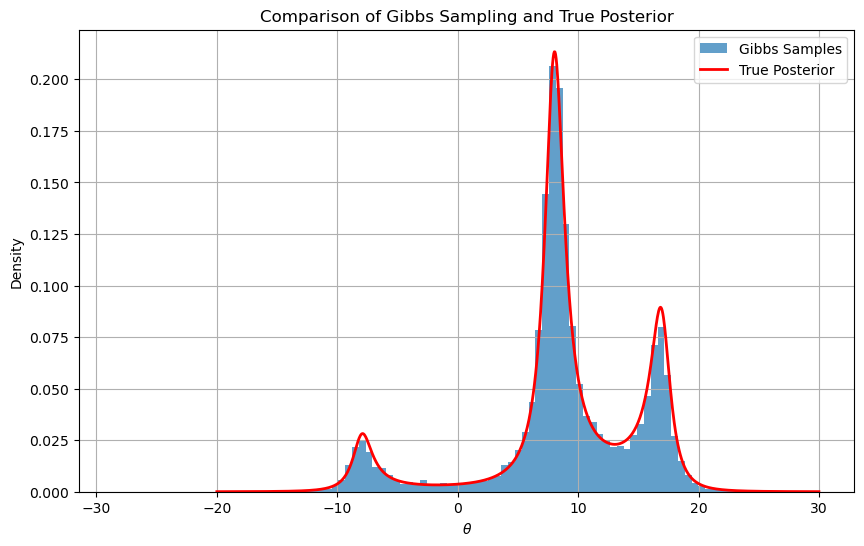

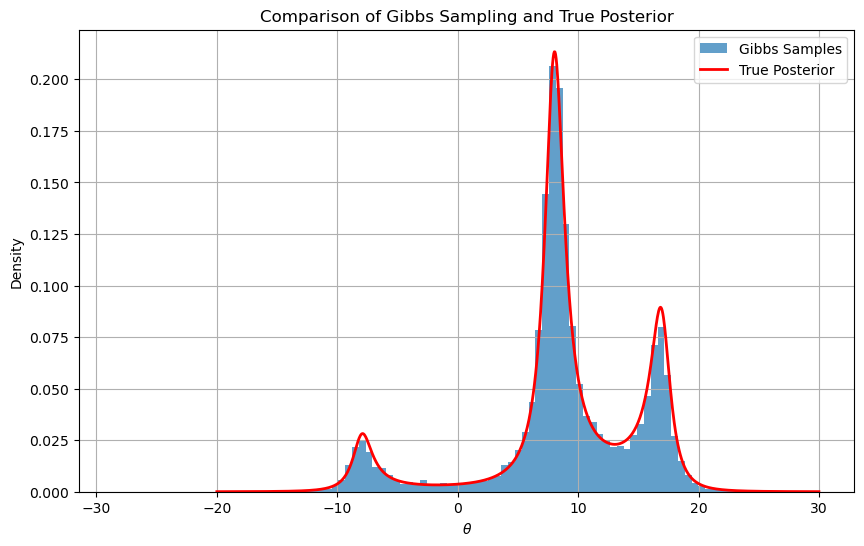

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters from the problem
z1, z2, z3 = -8, 8, 17  # Observations
sigma = 50  # Standard deviation
n_samples = 20000  # Number of samples to generate

# Derived parameter
sigma_inv_sq = 1 / (sigma ** 2)  # 1 / sigma^2

# Define the true posterior density (up to a constant)
def true_posterior(theta, z1, z2, z3):
    term1 = 1 / (1 + (theta - z1)**2)
    term2 = 1 / (1 + (theta - z2)**2)
    term3 = 1 / (1 + (theta - z3)**2)
    return term1 * term2 * term3

# Function to compute mu (mean of theta | eta1, eta2, eta3)
def compute_mu(eta1, eta2, eta3, z1, z2, z3, sigma_inv_sq):
    numerator = eta1 * z1 + eta2 * z2 + eta3 * z3
    denominator = eta1 + eta2 + eta3 + sigma_inv_sq
    return numerator / denominator

# Function to compute tau^2 (variance of theta | eta1, eta2, eta3)
def compute_tau_sq(eta1, eta2, eta3, sigma_inv_sq):
    return 1 / (eta1 + eta2 + eta3 + sigma_inv_sq)

# Initialize variables
theta = 0  # Initial value for theta
eta1, eta2, eta3 = 1, 1, 1  # Initial values for eta_i
theta_samples = []

# Gibbs sampling loop
for _ in range(n_samples):
    # Step 1: Sample eta_i | theta, z_i ~ Exp((1 + (theta - z_i)^2) / 2)
    rate1 = (1 + (theta - z1)**2) / 2
    rate2 = (1 + (theta - z2)**2) / 2
    rate3 = (1 + (theta - z3)**2) / 2
    
    eta1 = expon.rvs(scale=1/rate1)
    eta2 = expon.rvs(scale=1/rate2)
    eta3 = expon.rvs(scale=1/rate3)
    
    # Step 2: Sample theta | eta1, eta2, eta3 ~ N(mu, tau^2)
    mu = compute_mu(eta1, eta2, eta3, z1, z2, z3, sigma_inv_sq)
    tau_sq = compute_tau_sq(eta1, eta2, eta3, sigma_inv_sq)
    theta = norm.rvs(loc=mu, scale=np.sqrt(tau_sq))
    
    # Store the sample
    theta_samples.append(theta)

# Convert to numpy array for easier handling
theta_samples = np.array(theta_samples)

# Compute the true posterior for plotting
theta_range = np.linspace(-20, 30, 1000)
true_density = [true_posterior(t, z1, z2, z3) for t in theta_range]

# Normalize the true density for comparison with histogram
true_density = true_density / np.trapz(true_density, theta_range)

# Plot histogram of samples and true density
plt.figure(figsize=(10, 6))
plt.hist(theta_samples, bins=100, density=True, alpha=0.7, label="Gibbs Samples")
plt.plot(theta_range, true_density, 'r-', label="True Posterior", linewidth=2)
plt.title("Comparison of Gibbs Sampling and True Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()# Compute the true posterior for plotting
theta_range = np.linspace(-20, 30, 1000)
true_density = [true_posterior(t, z1, z2, z3) for t in theta_range]

# Normalize the true density for comparison with histogram
true_density = true_density / np.trapz(true_density, theta_range)

# Plot histogram of samples and true density
plt.figure(figsize=(10, 6))
plt.hist(theta_samples, bins=100, density=True, alpha=0.7, label="Gibbs Samples")
plt.plot(theta_range, true_density, 'r-', label="True Posterior", linewidth=2)
plt.title("Comparison of Gibbs Sampling and True Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

